# Projeto 2 - Ciência dos Dados

## **Membros**

**Gabriel Salvator Benatar**

**Matheus Freitas Sant'Ana**

In [12]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Classificador de gênero de uma música usando Dataset do Spotify

Esse projeto tem como principal objetivo simular o _Recommendation Engine_ do Spotify, avaliando diversos aspectos sobre as músicas conforme será explicado.

In [13]:
# Dado um artista, a quais gêneros suas músicas pertencem, considerando os audio features de cada track.
df_artist = pd.read_csv('data_w_genres.csv')

# Dado um gênero, quais são os principais audio features que tem.
df_genre = pd.read_csv('data_by_genres.csv')

In [29]:
df_artist.head()

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2,1,2267,"['tango', 'vintage tango']"
1,1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1,1,1068,"['classical', 'early romantic era', 'polish cl..."
2,2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,0,1,965,"['classical', 'classical era', 'early romantic..."
3,3,Wolfgang Amadeus Mozart,0.962084,0.353895,327808.037306,0.138348,0.514837,0.187091,-20.214154,0.067756,108.594920,0.332855,9.624870,7,1,965,"['classical', 'classical era']"
4,4,Johann Sebastian Bach,0.958405,0.354224,203461.757872,0.201932,0.744322,0.165837,-20.936518,0.048844,106.551869,0.570526,14.704669,7,1,921,"['baroque', 'classical', 'early music', 'germa..."


In [15]:
df_genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.983000,0.218500,1.496130e+05,0.018350,0.874000,0.112800,-37.256000,0.038750,69.526500,0.062900,40.500000,1,1
1,432hz,0.485070,0.330000,1.059273e+06,0.463084,0.480393,0.118862,-17.099000,0.086288,125.227125,0.217675,52.125000,6,1
2,[],0.686395,0.516830,2.305397e+05,0.397491,0.202883,0.221324,-12.773475,0.109871,111.933224,0.513905,21.556669,7,1
3,a cappella,0.666036,0.576732,1.961439e+05,0.334535,0.028486,0.128292,-13.011177,0.106782,112.461108,0.502521,38.786415,11,1
4,abstract,0.352395,0.489100,3.429772e+05,0.509300,0.788033,0.122317,-13.812100,0.044157,124.176500,0.354130,41.600000,1,1


In [22]:
df_genre_col = df_genre.loc[:,['genres']]
df_genre_col = df_genre_col.set_index('genres')
df_genre_col.head()

""
genres
21st century classical
432hz
[]
a cappella
abstract


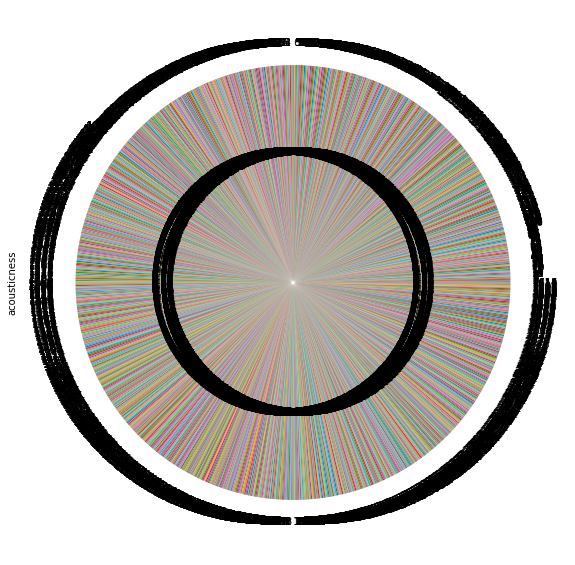

In [27]:
maestro = []
for i in df_artist['genres']:
    for j in df_artist['genres'][i]:
        if j == 'classical':
            maestro.append(df_artist['artist'][i])